## Basic Dataset

In [13]:
import torch
from torch.utils.data import Dataset
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.optim as optim

class SinDataset(Dataset):
    def __init__(self, data):
        """
        Initialize the dataset with the data.

        Args:
            data (list or array-like): List of numbers to use as data.
        """
        self.data = data
        self.x = data
        self.y = np.sin(data)

    def __len__(self):
        """
        Return the number of samples in the dataset.
        """
        return len(self.data)

    def __getitem__(self, idx):
        """
        Fetch the data and its label at index `idx`.

        Args:
            idx (int): Index of the sample to retrieve.
        
        Returns:
            tuple: (data, label) where label is the square of the data.
        """
        x = self.data[idx]  # Get the input data
        y = np.sin(x)         # Label is the square of the input
        return x, y


## Create and Test Dataset

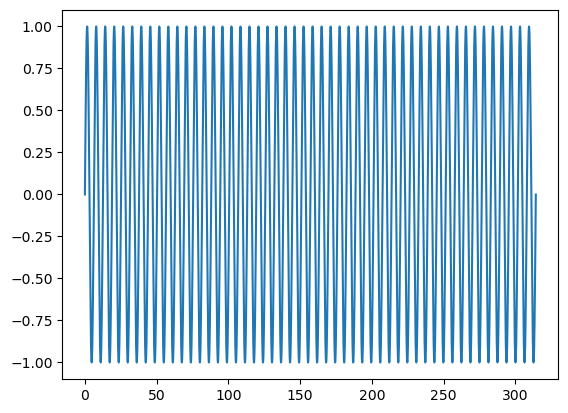

In [14]:
# Create an instance of the dataset
numbers = np.linspace(0, 100*np.pi, 100000)  # Data: [1, 2, 3, ..., 10]
dataset = SinDataset(numbers)
plt.plot(dataset.x, dataset.y)


## Use with DataLoader

In [3]:
from torch.utils.data import DataLoader

# Create a DataLoader
dataloader = DataLoader(dataset, batch_size=10000, shuffle=False)

# Iterate through the DataLoader
for batch in dataloader:
    x_batch, y_batch = batch
    print(f"Batch Inputs: {len(x_batch)}, Batch Labels: {len(y_batch)}")


Batch Inputs: 10000, Batch Labels: 10000
Batch Inputs: 10000, Batch Labels: 10000
Batch Inputs: 10000, Batch Labels: 10000
Batch Inputs: 10000, Batch Labels: 10000
Batch Inputs: 10000, Batch Labels: 10000
Batch Inputs: 10000, Batch Labels: 10000
Batch Inputs: 10000, Batch Labels: 10000
Batch Inputs: 10000, Batch Labels: 10000
Batch Inputs: 10000, Batch Labels: 10000
Batch Inputs: 10000, Batch Labels: 10000


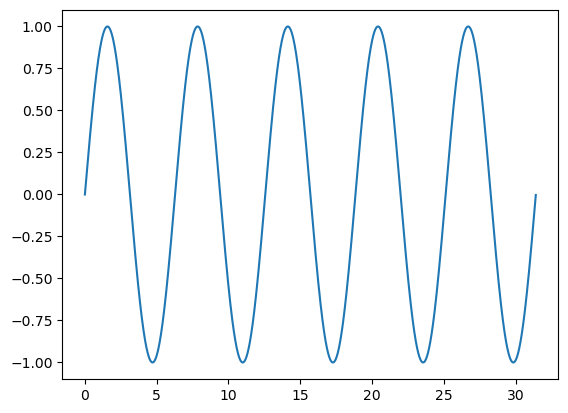

In [4]:
for x, y in dataloader:
    plt.plot(x, y)
    break

## Splitting the Dataset with random_split

In [5]:
from torch.utils.data import random_split

# Define split sizes
train_size = int(0.8 * len(dataset))  # 80% for training
test_size = len(dataset) - train_size  # Remaining 20% for testing

# Split the dataset
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

# Check the sizes
print(f"Training set size: {len(train_dataset)}")
print(f"Test set size: {len(test_dataset)}")


Training set size: 80000
Test set size: 20000
